# Homework Aswer for week 4

by Rahma Hayuning Astuti

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [38]:
#data path 

data_path = "../data/week_03-04/bank/bank-full.csv"
df = pd.read_csv(data_path, sep=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [39]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

## Dataset Preparation

In [40]:
#drop the ['default', and 'loan'] column

df = df.drop(['default', 'loan'], axis=1)
df.head()

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,2143,yes,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,29,yes,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,2,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,1506,yes,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,1,no,unknown,5,may,198,1,-1,0,unknown,no


In [41]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
balance      0
housing      0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [42]:
# split the dataset

from sklearn.model_selection import train_test_split

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)
len(df_train), len(df_val),len(df_test)

(27126, 9042, 9043)

In [43]:
#rest index
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [44]:
#y variable
y_train = df_train.y.values
y_val = df_val.y.values
y_test = df_test.y.values

In [45]:
#del above_average in dataset for train
del df_train['y']
del df_val['y']
del df_test['y']

In [46]:
import numpy as np

# Convert the target labels to binary values (0 and 1)
y_train_binary = np.where(y_train == 'yes', 1, 0)
y_val_binary = np.where(y_val == 'yes', 1, 0)
y_test_binary = np.where(y_test == 'yes', 1, 0)


In [47]:
df.dtypes

age           int64
job          object
marital      object
education    object
balance       int64
housing      object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [48]:
num_colls = [i for i in df.dtypes[df.dtypes!='object'].index]
num_colls

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

## Question 1: ROC AUC feature importance

used to evaluate feature importance of numerical variables

In [49]:
from sklearn.metrics import roc_auc_score

for n in num_colls:
    auc = roc_auc_score(y_train_binary, df_train[n])
    if auc < 0.5:
        auc = roc_auc_score(y_train_binary, -df_train[n])
    print(n, auc)

age 0.512185717527344
balance 0.5888313805382317
day 0.525957882383908
duration 0.8147002759670778
campaign 0.5714543015682159
pdays 0.5901276247352144
previous 0.5985653242764153


has the highest AUC: **duration**

## Question 2 Training the model

In [50]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [51]:
#apply one hot encoding and logistic regression
def train(df_train, y_train_binary, C=1.0):
    dicts = df_train.to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, class_weight='balanced')
    model.fit(X_train, y_train_binary)
    
    return dv, model

In [52]:
dv, model = train(df_train, y_train_binary, C=1.0)

In [53]:
def predict(df, dv, model):
    dicts = df.to_dict(orient='records')
    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [54]:
y_pred = predict(df_val, dv, model)
print(y_pred[:10]) 
auc = roc_auc_score(y_val_binary, y_pred)
auc.round(decimals=3)

[0.12818326 0.07187131 0.09977683 0.05877425 0.14278545 0.17442156
 0.23071214 0.16566695 0.25078343 0.0234851 ]


0.904

uh- I think I get wrong somewhere but the closest one is 0.89

## Question 3: Precision and Recall

In [19]:
print(y_train_binary.mean())  # Check the proportion of positive labels


0.11579296615792967


In [20]:
auc = roc_auc_score(y_val_binary, y_pred)
print(f"AUC: {auc}")


AUC: 0.9035167850729239


In [55]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [56]:
thresholds = np.linspace(0, 1, 101)
for t in thresholds:
    y_pred_binary = (y_pred >= t).astype(int)
    precision = precision_score(y_val_binary, y_pred_binary)
    recall = recall_score(y_val_binary, y_pred_binary)
    print(f"Threshold: {t}, Precision: {precision}, Recall: {recall}")


Threshold: 0.0, Precision: 0.12143331121433311, Recall: 1.0
Threshold: 0.01, Precision: 0.12265415549597855, Recall: 1.0
Threshold: 0.02, Precision: 0.12646991007608946, Recall: 0.9990892531876139
Threshold: 0.03, Precision: 0.13156632285919884, Recall: 0.9990892531876139
Threshold: 0.04, Precision: 0.13686313686313686, Recall: 0.9981785063752276
Threshold: 0.05, Precision: 0.14202258860184344, Recall: 0.9963570127504554
Threshold: 0.06, Precision: 0.14759848893685915, Recall: 0.9963570127504554
Threshold: 0.07, Precision: 0.1540628080552035, Recall: 0.9963570127504554
Threshold: 0.08, Precision: 0.15951546993578516, Recall: 0.9954462659380692
Threshold: 0.09, Precision: 0.16570648878107944, Recall: 0.9954462659380692
Threshold: 0.1, Precision: 0.17218021424070573, Recall: 0.9954462659380692
Threshold: 0.11, Precision: 0.1793567443386938, Recall: 0.9954462659380692
Threshold: 0.12, Precision: 0.18597924110940955, Recall: 0.9954462659380692
Threshold: 0.13, Precision: 0.1922398589065255

c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### plot the recall and precision

In [57]:
scores = []

thresholds = np.linspace(0, 1, 101)

for t in thresholds:
    actual_positive = (y_val_binary == 1)
    actual_negative = (y_val_binary == 0)
    
    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)

    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()

    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()
    
    scores.append((t, tp, fp, fn, tn))


In [58]:
columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
df_scores = pd.DataFrame(scores, columns=columns)

df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)

# Compute precision and recall and add them as new columns
df_scores['precision'] = df_scores['tp'] / (df_scores['tp'] + df_scores['fp'])
df_scores['recall'] = df_scores['tp'] / (df_scores['tp'] + df_scores['fn'])

# Drop rows where precision or recall is NaN
df_scores_cleaned = df_scores.dropna(subset=['precision', 'recall'])



In [59]:
# Find intersections with a loose tolerance
intersection = df_scores_cleaned[np.isclose(df_scores_cleaned['precision'], df_scores_cleaned['recall'], atol=0.01)]

# Display the intersection
print(intersection)

    threshold   tp   fp   fn    tn       tpr       fpr  precision    recall
77       0.77  615  497  483  7447  0.560109  0.062563   0.553058  0.560109
78       0.78  603  477  495  7467  0.549180  0.060045   0.558333  0.549180


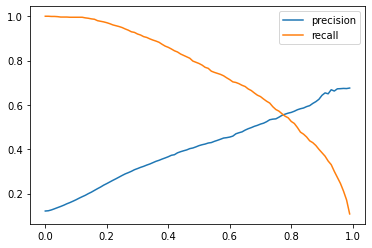

In [60]:
plt.plot(df_scores_cleaned.threshold, df_scores_cleaned['precision'], label='precision')
plt.plot(df_scores_cleaned.threshold, df_scores_cleaned['recall'], label='recall')
plt.legend()

Answer: they have itersect around 77, 78 but I there's no. so, i will choose 0.665

## Question 4: F1 score

C:\Users\asus\AppData\Local\Temp/ipykernel_15956/2177526000.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_scores_cleaned['f1_score'] = 2 * df_scores_cleaned.precision * df_scores_cleaned.recall / (df_scores_cleaned.precision + df_scores_cleaned.recall)


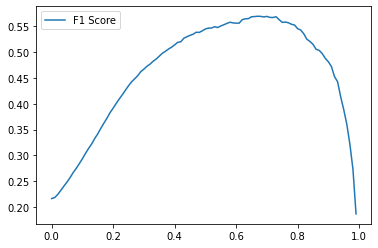

In [61]:
df_scores_cleaned['f1_score'] = 2 * df_scores_cleaned.precision * df_scores_cleaned.recall / (df_scores_cleaned.precision + df_scores_cleaned.recall) 
plt.plot(df_scores_cleaned.threshold, df_scores_cleaned['f1_score'], label='F1 Score')
plt.legend()

The answer around more than 0.6 so.. 0.62

## Question 5: 5-Fold CV

KFold(n_splits=5, shuffle=True, random_state=1)

In [31]:
from sklearn.model_selection import KFold
from tqdm.auto import tqdm

In [62]:
kfold = KFold(n_splits=5, shuffle=True, random_state=1)
scores = []

for train_idx, val_idx in kfold.split(df_full_train):
    df_train = df_full_train.iloc[train_idx].copy()
    df_val = df_full_train.iloc[val_idx].copy()

    y_train = df_train.y.values
    y_val = df_val.y.values

    del df_train['y']
    del df_val['y']

    y_train_binary = np.where(y_train == 'yes', 1, 0)
    y_val_binary = np.where(y_val == 'yes', 1, 0)

    dv, model = train(df_train, y_train_binary, C=1.0)
    y_pred = predict(df_val, dv, model)

    auc = roc_auc_score(y_val_binary, y_pred)
    scores.append(auc)

print('%.3f +- %.3f' % (np.mean(scores), np.std(scores)))

0.909 +- 0.005


I got 0.005 but the close one is 0.006

## Question 6: Hyperparameter Tuning

In [64]:
n_splits = 5

for C in tqdm([0.000001, 0.001, 1]):
    kfold = KFold(n_splits=5, shuffle=True, random_state=1)
    scores = []

    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx].copy()
        df_val = df_full_train.iloc[val_idx].copy()

        y_train = df_train.y.values
        y_val = df_val.y.values

        del df_train['y']
        del df_val['y']

        y_train_binary = np.where(y_train == 'yes', 1, 0)
        y_val_binary = np.where(y_val == 'yes', 1, 0)

        dv, model = train(df_train, y_train_binary, C=1.0)
        y_pred = predict(df_val, dv, model)

        auc = roc_auc_score(y_val_binary, y_pred)
        scores.append(auc)

    print('C=%s %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))

  0%|          | 0/3 [00:00<?, ?it/s]

C=1e-06 0.909 +- 0.005
C=0.001 0.909 +- 0.005
C=1 0.909 +- 0.005


I have tie so, the small one is the answer 1e-06